# Occurences of Nationalities #

Hypothesis: "The model reacts too sensitive to mentionings of nationalities, since it could be a generalization based on ethnicity"

Reason: Manual Analysis

Soruce: Verzeichnis der Staatennamen für den amtlichen Gebrauch in der Bundesrepublik Deutschland (https://www.auswaertiges-amt.de/de/service/terminologie/-/215252)

#### Example ####

ID: 38
Label: True
Prediction: False
Confidence: 0.9646481
Comment: Was macht die Frau in Deutschland? Sich vor der Wehrpflicht zu drücken, begründet kein Asyl. Und Migranten kennt unser Asylrecht nicht. Also, was macht die Frau hier?

ID: 106
Label: True
Prediction: False
Confidence: 0.789294
Comment: Ist doch so oder so nur wieder eine Beruhigungspille, für das gutgläubige deutsche Volk

ID: 315
Label: True
Prediction: False
Confidence: 0.51014405
Comment: Der Bürgermeister von Boostedt hat mutig und eindrucksvoll beschrieben, wie furchtbar sich die afrikanischen Migranten, die keine Bleibeperspektive haben, verhalten und wie die Akzeptanz in der Bevölkerung schwindet

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [2]:
import csv
import requests
import datetime
import math

requestData = []
responseData = []
output = []
i = 0
stepsize = 100
maxLines = 670

countries = []
adjectives = []
nationalities = []

with open('../data/Nationalitäten.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        countries.append(row['country'])
        if row['adjektiv'] != '---':
            adjectives.append(row['adjektiv'])
        if row['nationalityM'] != '---':
            nationalities.append(row['nationalityM'])
        if row['nationalityF'] != '---':
            nationalities.append(row['nationalityF'])

In [3]:
# als Teilwort
def all(c):
    return True
def find_filter(contains):
    def f(element):
        return element['text'].lower().find(contains) > 0
    return f
def contains_adjective(element):
    for adjective in adjectives:
        if element['text'].lower().find(adjective) > 0:
            return True
    return False

def contains_country(element):
    for country in countries:
        if element['text'].lower().find(country.lower()) > 0:
            return True
    return False

def contains_nationality(element):
    for nationality in nationalities:
#         for token in element['tokens']:
#             if token.lower() == nationality.lower():
#                 return True
        if element['text'].lower().find(nationality.lower()) > 0:
            return True
    return False
def contains_adjective_without_deutsch(element):
    for adjective in adjectives:
        if element['text'].lower().find(adjective) > 0 and element['text'].lower().find('deutsch') == -1:
            return True
    return False

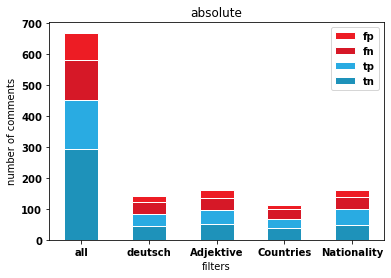

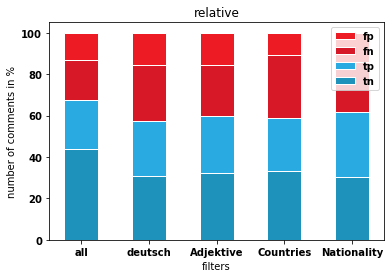

In [4]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('deutsch',find_filter('deutsch')))
diagram_filters.append(('Adjektive',contains_adjective))
diagram_filters.append(('Countries',contains_country))
diagram_filters.append(('Nationality',contains_nationality))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [5]:
print('all')
show_metrics(calc_metrics())
print('Nationality')
show_metrics(calc_metrics(diagram_filters[4][1]))
print('Nationality change')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[4][1])))

all


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


Nationality


,label hate (90),label nohate (72)
pred hate (74),51,23
pred nohate (88),39,49


accuracy,precision,recall,f1_score
0.6172839506172839,0.6891891891891891,0.5666666666666667,0.621951219512195


Nationality change


,label hate (287),label nohate (383)
pred hate (261),196,65
pred nohate (409),91,318


accuracy,precision,recall,f1_score
0.7671641791044777,0.7509578544061303,0.6829268292682927,0.7153284671532847
